In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()
os.chdir('E:/Project_files')

In [3]:
os.getcwd()

'E:\\Project_files'

Imported the files of Hospitality data

In [4]:
date_info = pd.read_csv('E:/Project_files/Hospitality data/dim_date.csv', delimiter= ',', header= 0)
date_info.head()

,date,mmm yy,week_no,day_type
0,01-May-22,May-22,W 19,weekend
1,02-May-22,May-22,W 19,weekeday
2,03-May-22,May-22,W 19,weekeday
3,04-May-22,May-22,W 19,weekeday
4,05-May-22,May-22,W 19,weekeday


Rename the column to get better understanding

In [5]:
date_info =date_info.rename(columns= {'mmm yy' : 'month_year'})

In [6]:
date_info.head()

,date,month_year,week_no,day_type
0,01-May-22,May-22,W 19,weekend
1,02-May-22,May-22,W 19,weekeday
2,03-May-22,May-22,W 19,weekeday
3,04-May-22,May-22,W 19,weekeday
4,05-May-22,May-22,W 19,weekeday


In [7]:
hotel_details = pd.read_csv('E:/Project_files/Hospitality data/dim_hotels.csv', delimiter= ',', header= 0)

In [8]:
hotel_details = hotel_details.rename(columns= {'category' : 'hotel_category'})

In [9]:
hotel_details.head()

,hotel_id,hotel_name,hotel_category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [10]:
detailed_room_details = pd.read_csv('E:/Project_files/Hospitality data/fact_aggregated_bookings.csv', delimiter= ',', header= 0)

In [11]:
room_details = pd.read_csv('E:/Project_files/Hospitality data/dim_rooms.csv', delimiter= ',', header= 0)
room_details.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


Renamed the column for better understanding and helped for merging datasets

In [12]:
room_details = room_details.rename(columns= {'room_id' : 'room_category'})

In [13]:
room_details.head()

,room_category,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [14]:
booking_details = pd.read_csv('E:/Project_files/Hospitality data/fact_bookings.csv', delimiter= ',', header= 0)
booking_details.head()

,booking_id,hotel_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,final_revenue(after 40% deduct if cancel)
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,0,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5,Checked Out,9100,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,0,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5,Checked Out,10920,10920


Checked the data types

In [15]:
booking_details.dtypes

booking_id                                   object
hotel_id                                      int64
booking_date                                 object
check_in_date                                object
checkout_date                                object
no_guests                                     int64
room_category                                object
booking_platform                             object
ratings_given                                 int64
booking_status                               object
revenue_generated                             int64
final_revenue(after 40% deduct if cancel)     int64
dtype: object

Converted the date format to merege dataset

In [16]:
booking_details['check_in_date'] = pd.to_datetime(booking_details['check_in_date'], format= '%d-%m-%Y')

In [17]:
booking_details['check_in_date'] = booking_details['check_in_date'].dt.strftime('%d-%b-%y')

In [18]:
booking_details.head()

,booking_id,hotel_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,final_revenue(after 40% deduct if cancel)
0,May012216558RT11,16558,27-04-2022,01-May-22,02-05-2022,3,RT1,direct online,1,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-May-22,02-05-2022,2,RT1,others,0,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-May-22,04-05-2022,2,RT1,logtrip,5,Checked Out,9100,9100
3,May012216558RT14,16558,28-04-2022,01-May-22,02-05-2022,2,RT1,others,0,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-May-22,02-05-2022,4,RT1,direct online,5,Checked Out,10920,10920


In [19]:
detailed_room_details.head()

,hotel_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


Found how many rows and columns in each dataset

In [20]:
detailed_room_details.shape

(9200, 5)

In [21]:
booking_details.shape

(134590, 12)

In [22]:
room_details.shape

(4, 2)

In [23]:
hotel_details.shape

(25, 4)

In [24]:
date_info.shape

(92, 4)

In [25]:
date_info.duplicated().sum()

0

There is no duplicate values in date_info, we can not find duplicate values in other dataset that are not mentioned below as different people booked the same hotel on same date

In [26]:
hotel_details.duplicated().sum()

0

In [27]:
detailed_room_details.duplicated().sum()

0

Checked NA Values

In [28]:
detailed_room_details.isna().sum()

hotel_id               0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [29]:
hotel_details.isna().sum()

hotel_id          0
hotel_name        0
hotel_category    0
city              0
dtype: int64

In [30]:
date_info.isna().sum()

date          0
month_year    0
week_no       0
day_type      0
dtype: int64

In [31]:
room_details.isna().sum()

room_category    0
room_class       0
dtype: int64

In [32]:
booking_details.isna().sum()

booking_id                                   0
hotel_id                                     0
booking_date                                 0
check_in_date                                0
checkout_date                                0
no_guests                                    0
room_category                                0
booking_platform                             0
ratings_given                                0
booking_status                               0
revenue_generated                            0
final_revenue(after 40% deduct if cancel)    0
dtype: int64

Merged all relevent files to get insights of the data

In [33]:
merged_booking_details = pd.merge(booking_details, room_details, on= 'room_category', how= 'inner')

In [34]:
merged_booking_details.head()

,booking_id,hotel_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,final_revenue(after 40% deduct if cancel),room_class
0,May012216558RT11,16558,27-04-2022,01-May-22,02-05-2022,3,RT1,direct online,1,Checked Out,10010,10010,Standard
1,May012216558RT12,16558,30-04-2022,01-May-22,02-05-2022,2,RT1,others,0,Cancelled,9100,3640,Standard
2,May012216558RT13,16558,28-04-2022,01-May-22,04-05-2022,2,RT1,logtrip,5,Checked Out,9100,9100,Standard
3,May012216558RT14,16558,28-04-2022,01-May-22,02-05-2022,2,RT1,others,0,Cancelled,9100,3640,Standard
4,May012216558RT15,16558,27-04-2022,01-May-22,02-05-2022,4,RT1,direct online,5,Checked Out,10920,10920,Standard


In [35]:
merged_booking_details.shape

(134590, 13)

In [36]:
merged_booking_details_1 = pd.merge(merged_booking_details, hotel_details, on= 'hotel_id', how= 'inner')

In [37]:
merged_booking_details_1.head()

,booking_id,hotel_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,final_revenue(after 40% deduct if cancel),room_class,hotel_name,hotel_category,city
0,May012216558RT11,16558,27-04-2022,01-May-22,02-05-2022,3,RT1,direct online,1,Checked Out,10010,10010,Standard,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-2022,01-May-22,02-05-2022,2,RT1,others,0,Cancelled,9100,3640,Standard,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-2022,01-May-22,04-05-2022,2,RT1,logtrip,5,Checked Out,9100,9100,Standard,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-2022,01-May-22,02-05-2022,2,RT1,others,0,Cancelled,9100,3640,Standard,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,27-04-2022,01-May-22,02-05-2022,4,RT1,direct online,5,Checked Out,10920,10920,Standard,Atliq Grands,Luxury,Delhi


In [38]:
merged_booking_details_1.shape

(134590, 16)

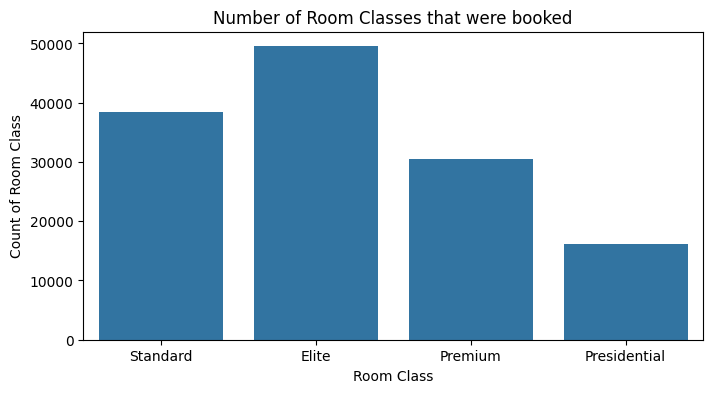

In [39]:
plt.figure(figsize=(8,4))
ax = sb.countplot(data = merged_booking_details_1, x = 'room_class')
plt.title('Number of Room Classes that were booked')
plt.xlabel('Room Class')
plt.ylabel('Count of Room Class')
plt.xticks(rotation = 0)
plt.show()

Maximum Guests booked Elite Class and minimum guests booked Presidential Class

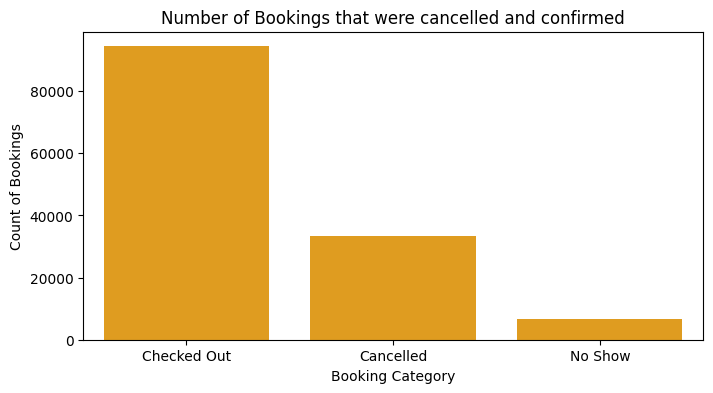

In [40]:
plt.figure(figsize=(8,4))
ax = sb.countplot(data = merged_booking_details_1, x = 'booking_status', color= 'orange')
plt.title('Number of Bookings that were cancelled and confirmed')
plt.xlabel('Booking Category')
plt.ylabel('Count of Bookings')
plt.xticks(rotation = 0)
plt.show()

As we can see, there are less number of bookings that are cancelled

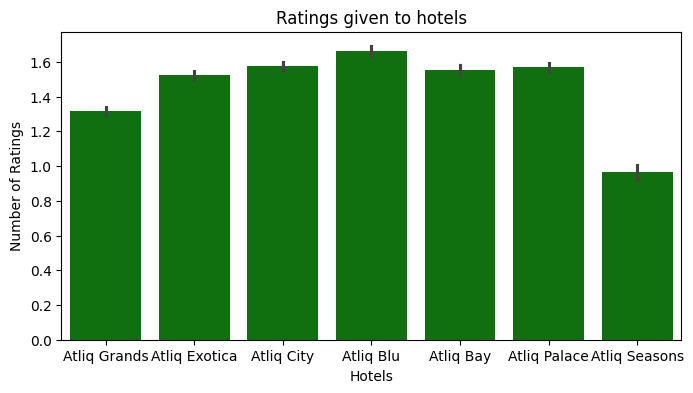

In [41]:
plt.figure(figsize=(8,4))
ax = sb.barplot(data = merged_booking_details_1, x = 'hotel_name', y = 'ratings_given', color= 'green')
plt.title('Ratings given to hotels')
plt.xlabel('Hotels')
plt.ylabel('Number of Ratings')
plt.xticks(rotation = 0)
plt.show()

Atliq Blu Hotels got the highest ratings and Aliq Seasons got lowest ratings

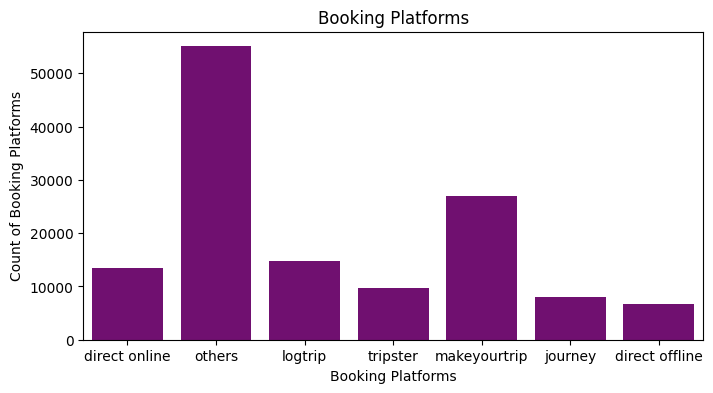

In [42]:
plt.figure(figsize=(8,4))
ax = sb.countplot(data = merged_booking_details_1, x = 'booking_platform', color= 'purple')
plt.title('Booking Platforms')
plt.xlabel('Booking Platforms')
plt.ylabel('Count of Booking Platforms')
plt.xticks(rotation = 0)
plt.show()

Others' booking platform got maximum bookings then makeyourtrip got maximum bookings

C:\Users\hp\AppData\Local\Temp\ipykernel_21584\2119127586.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data = merged_booking_details_1, x = 'hotel_category', palette= colors)


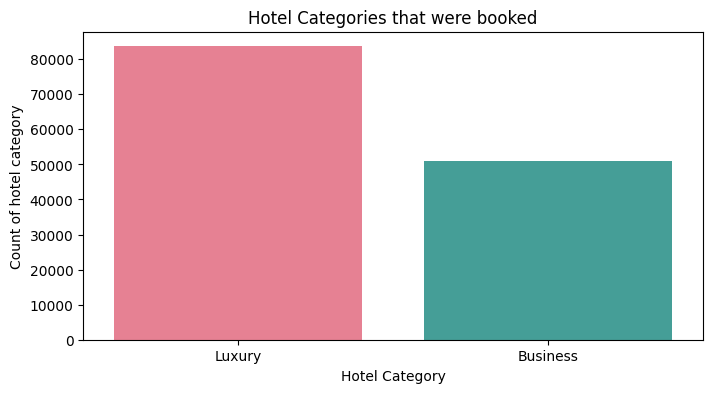

In [43]:
plt.figure(figsize=(8,4))
unique_categories = merged_booking_details_1['hotel_category'].unique()
colors = sb.color_palette("husl", len(unique_categories))
ax = sb.countplot(data = merged_booking_details_1, x = 'hotel_category', palette= colors)
plt.title('Hotel Categories that were booked')
plt.xlabel('Hotel Category')
plt.ylabel('Count of hotel category')
plt.xticks(rotation = 0)
plt.show()

Luxury Hotels were most booked by guests

C:\Users\hp\AppData\Local\Temp\ipykernel_21584\3248858978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data = merged_booking_details_1, x = 'city', palette= colors)


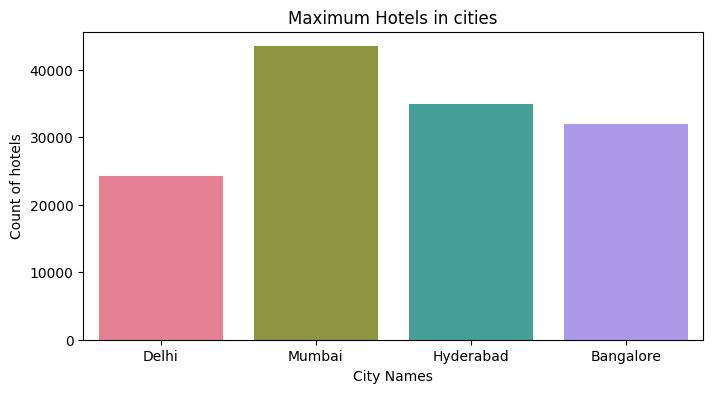

In [44]:
plt.figure(figsize=(8,4))
unique_categories = merged_booking_details_1['city'].unique()
colors = sb.color_palette("husl", len(unique_categories))
ax = sb.countplot(data = merged_booking_details_1, x = 'city', palette= colors)
plt.title('Maximum Hotels in cities')
plt.xlabel('City Names')
plt.ylabel('Count of hotels')
plt.xticks(rotation = 0)
plt.show()

Maximum Hotels are in Mumbai then followed by Hyderabad

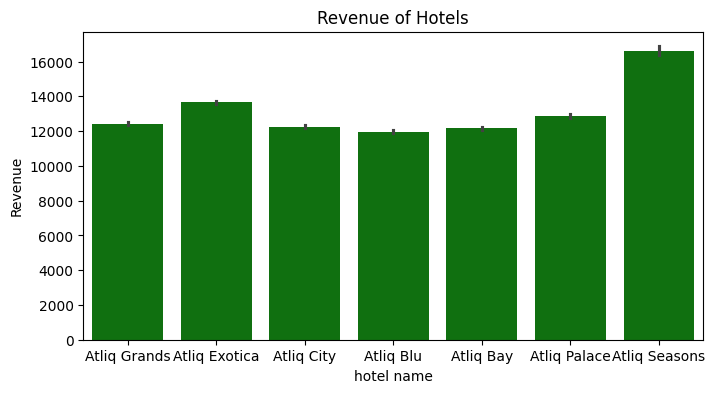

In [45]:
plt.figure(figsize=(8,4))
ax = sb.barplot(data = merged_booking_details_1, x = 'hotel_name', y = 'final_revenue(after 40% deduct if cancel)', color= 'green')
plt.title('Revenue of Hotels')
plt.xlabel('hotel name')
plt.ylabel('Revenue')
plt.xticks(rotation = 0)
plt.show()

Atliq Seasons' hotel have generated maximum revenue then Atliq Exotica

In [49]:
detailed_room_details.head()

,hotel_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [50]:
hotel_details.head()

,hotel_id,hotel_name,hotel_category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [53]:
detailed_room_details = pd.merge(hotel_details, detailed_room_details, on='hotel_id', how= 'inner' )
detailed_room_details.head()

,hotel_id,hotel_name_x,hotel_category_x,city_x,hotel_name_y,hotel_category_y,city_y,check_in_date,room_category,successful_bookings,capacity
0,16558,Atliq Grands,Luxury,Delhi,Atliq Grands,Luxury,Delhi,01-May-22,RT1,18,19
1,16558,Atliq Grands,Luxury,Delhi,Atliq Grands,Luxury,Delhi,01-May-22,RT2,21,22
2,16558,Atliq Grands,Luxury,Delhi,Atliq Grands,Luxury,Delhi,01-May-22,RT3,8,8
3,16558,Atliq Grands,Luxury,Delhi,Atliq Grands,Luxury,Delhi,01-May-22,RT4,3,3
4,16558,Atliq Grands,Luxury,Delhi,Atliq Grands,Luxury,Delhi,02-May-22,RT1,12,19


Dropped the irrelevent columns

detailed_room_details = detailed_room_details.drop(['hotel_name_y', 'hotel_category_y', 'city_y'], axis= 1)

In [56]:
detailed_room_details.head()

,hotel_id,hotel_name_x,hotel_category_x,city_x,check_in_date,room_category,successful_bookings,capacity
0,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT1,18,19
1,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT2,21,22
2,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT3,8,8
3,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT4,3,3
4,16558,Atliq Grands,Luxury,Delhi,02-May-22,RT1,12,19


In [57]:
detailed_room_details.rename(columns= {'hotel_name_x': 'hotel_name', 'hotel_category_x': 'hotel_category', 'city_x':'city'}, inplace= True)

In [58]:
detailed_room_details.head()

,hotel_id,hotel_name,hotel_category,city,check_in_date,room_category,successful_bookings,capacity
0,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT1,18,19
1,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT2,21,22
2,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT3,8,8
3,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT4,3,3
4,16558,Atliq Grands,Luxury,Delhi,02-May-22,RT1,12,19


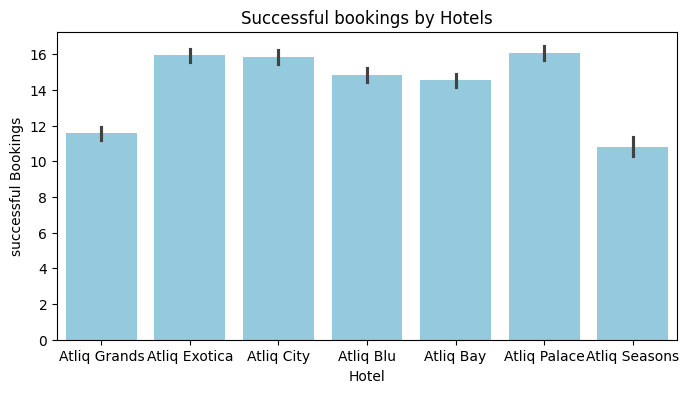

In [63]:
plt.figure(figsize=(8,4))
ax = sb.barplot(data = detailed_room_details, x = 'hotel_name',y = 'successful_bookings', color = 'skyblue')
plt.title('Successful bookings by Hotels')
plt.xlabel('Hotel')
plt.ylabel('successful Bookings')
plt.xticks(rotation = 0)
plt.show()

As we can see, Atliq Palace hotel got slightly more bookings than Atliq Exotica and Altiq City

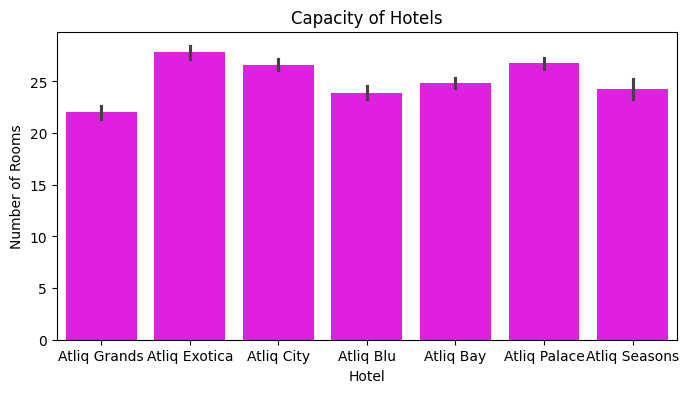

In [66]:
plt.figure(figsize=(8,4))
ax = sb.barplot(data = detailed_room_details, x = 'hotel_name',y = 'capacity', color = 'magenta')
plt.title('Capacity of Hotels')
plt.xlabel('Hotel')
plt.ylabel('Number of Rooms')
plt.xticks(rotation = 0)
plt.show()

AS we can see, Atliq Exotica has maximum capacity than Atliq Palace

Downloaded  the files to visualize the date in Tableau

In [67]:
csv_file_path = 'E:\\Project_files\\hospitality_file.csv'
merged_booking_details_1.to_csv(csv_file_path, index=False)

In [68]:
csv_file_path = 'E:\\Project_files\\hotels_details.csv'
detailed_room_details.to_csv(csv_file_path, index=False)

In [69]:
csv_file_path = 'E:\\Project_files\\date_info.csv'
date_info.to_csv(csv_file_path, index=False)